In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide, Chapter 44: Advanced Graphing (Axes, Plots, and Graphs)

Previously, in :ref:`Chapter 22 <usersGuide_22_graphing>`, we learned how to make plots of streams using the `.plot()` method on any stream, and to specify the type of graph in the first argument, the x axis in the second argument, and the y axis in the third (and the z in the fourth, for 3d graphs).  Let's review a simple graph:

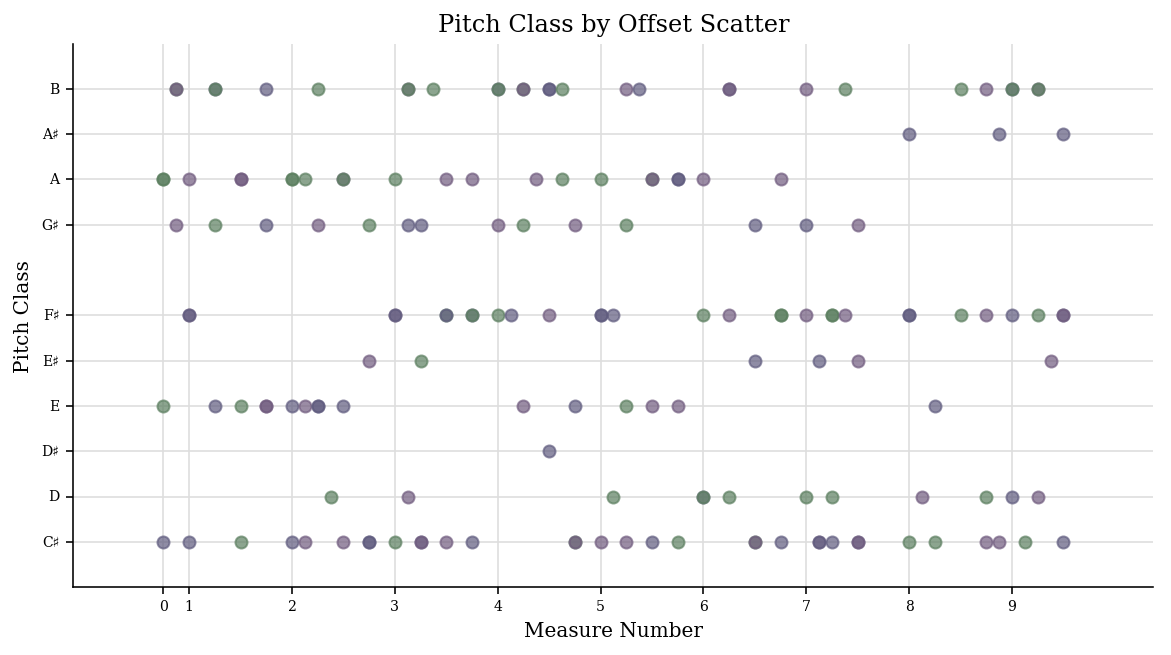

In [2]:
bach = corpus.parse('bwv66.6')
bach.id = 'bwv66'
bach.plot('scatter', 'offset', 'pitchClass')

When we call `s.plot()` we are actually just calling a function in `music21.graph` called :func:`~music21.graph.plotStream`.

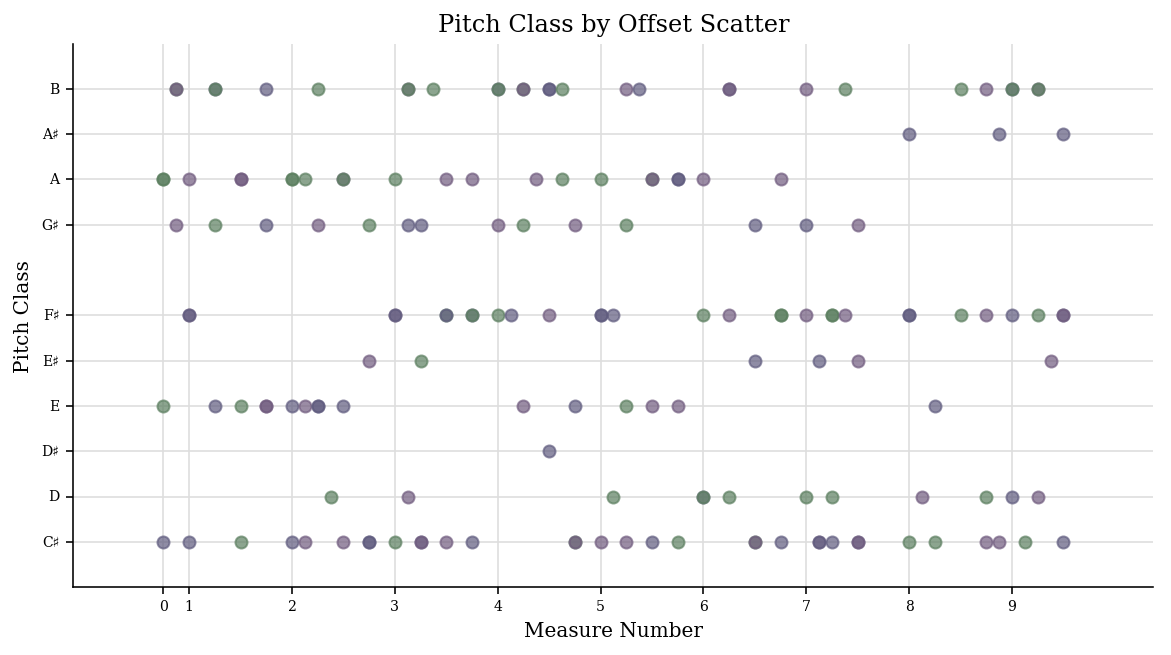

In [3]:
graph.plotStream(bach, 'scatter', 'offset', 'pitchClass')

`plotStream` uses a helper function called :func:`music21.graph.findPlot.getPlotsToMake` to get a list of classes that can successfully plot this relationship:

In [4]:
graph.findPlot.getPlotsToMake('scatter', 'offset', 'pitchClass')

[music21.graph.plot.ScatterPitchClassOffset]

A Plot is a class that can take in a stream and when `.run()` is called, will extract all the data from the stream and show it:

In [5]:
scatter = graph.plot.ScatterPitchClassOffset(bach)
scatter

<music21.graph.plot.ScatterPitchClassOffset for <music21.stream.Score bwv66>>

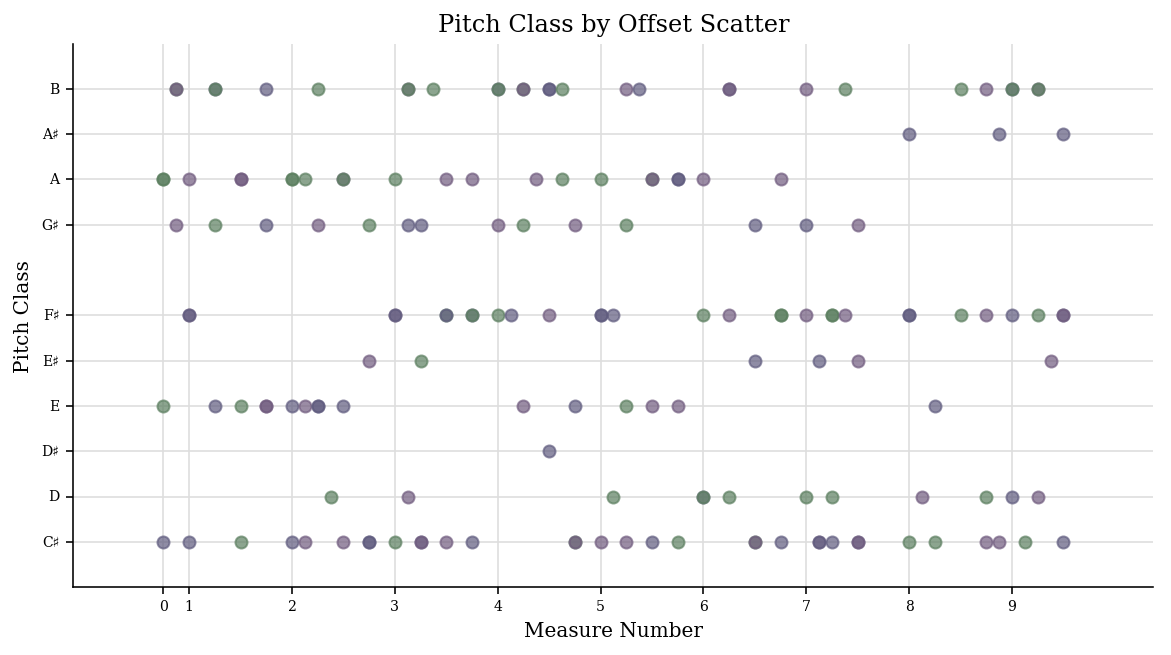

In [6]:
scatter.run()

## Customizing Plots

Well, so far we haven't done much that we couldn't do with `.plot()`, but we can change some things around.

Let's change the title:

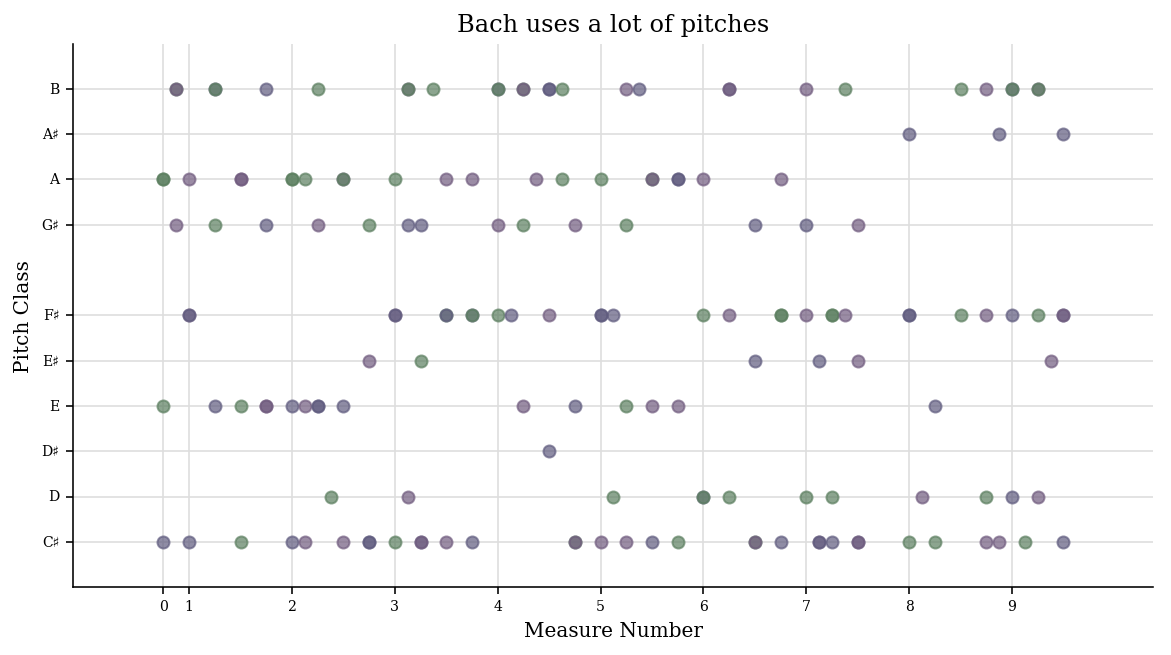

In [7]:
scatter.title = 'Bach uses a lot of pitches'
scatter.run()

We can change the figure size:

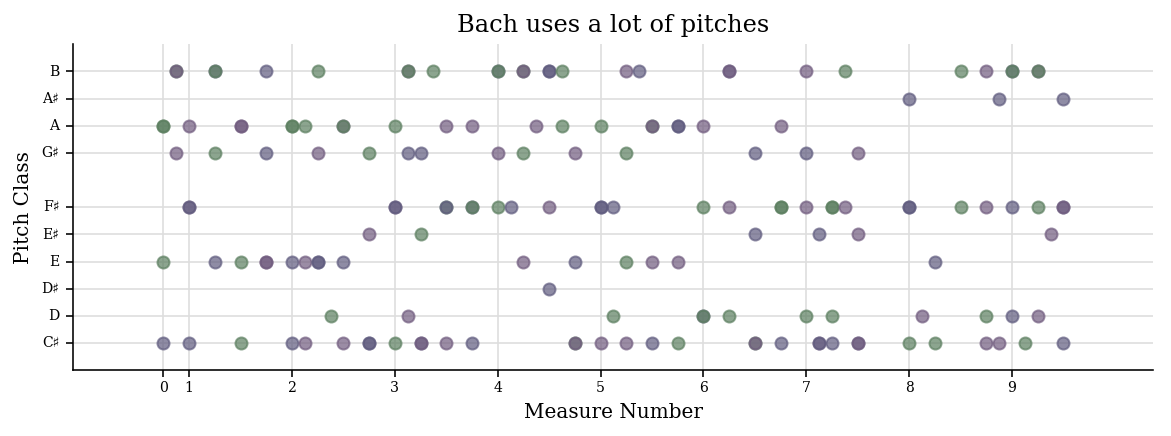

In [8]:
scatter.figureSize = (10, 3)
scatter.run()

We can change any of the following:

    *    alpha (which describes how transparent elements of the graph are)
    *    colorBackgroundData
    *    colorBackgroundFigure
    *    colorGrid 
    *    colors (a list of colors to cycle through)
    *    tickFontSize
    *    titleFontSize 
    *    labelFontSize 
    *    fontFamily
    *    marker
    *    markersize
    
 and a bunch more.  See `.keywordConfigurables`

In [9]:
scatter.keywordConfigurables

('alpha',
 'dpi',
 'colorBackgroundData',
 'colorBackgroundFigure',
 'colorGrid',
 'title',
 'figureSize',
 'marker',
 'markersize',
 'colors',
 'tickFontSize',
 'tickColors',
 'titleFontSize',
 'labelFontSize',
 'fontFamily',
 'hideXGrid',
 'hideYGrid',
 'xTickLabelRotation',
 'xTickLabelHorizontalAlignment',
 'xTickLabelVerticalAlignment',
 'doneAction')

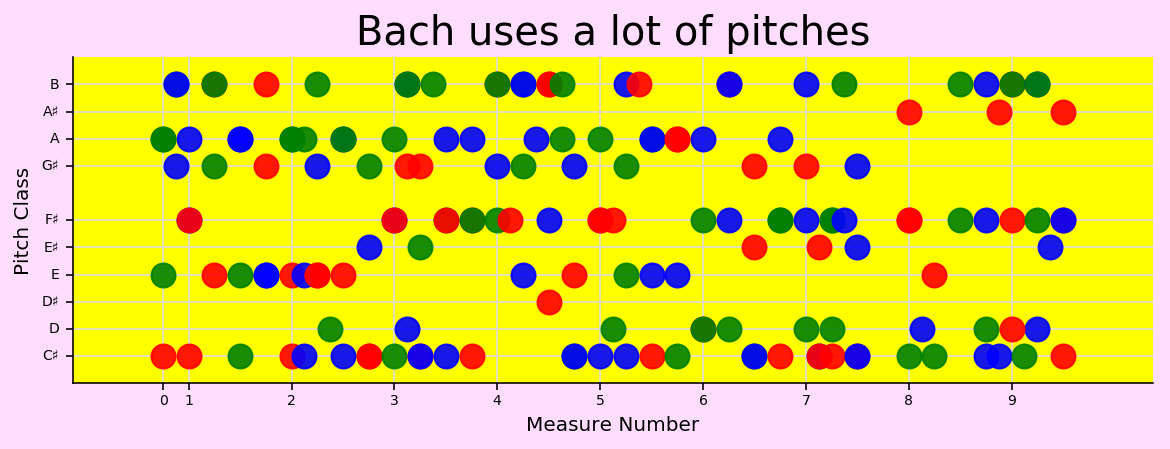

In [10]:
scatter.fontFamily = 'sans-serif'
scatter.markersize = 12
scatter.colors = ['red', 'green', 'blue'] # will cycle among these
scatter.alpha = 0.9
scatter.colorBackgroundFigure = '#ffddff' # a light purple
scatter.colorBackgroundData = 'yellow' 
scatter.titleFontSize = 20
scatter.run()

That's too garish for me.  Let's go back to our original graph:

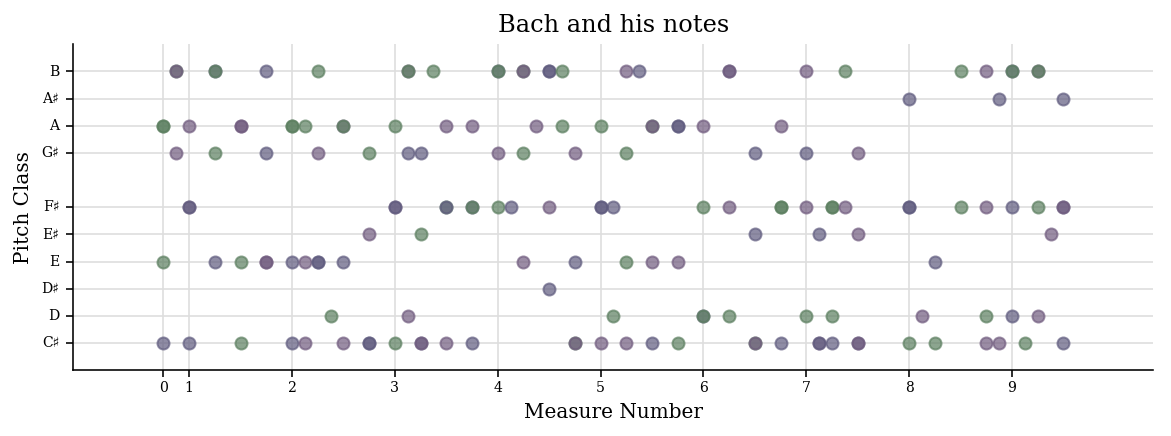

In [11]:
scatter = graph.plot.ScatterPitchClassOffset(bach)
scatter.title = 'Bach and his notes'
scatter.figureSize = (10, 3)
scatter.run()

Different graph types have other configurable data.  For instance, Histograms can configure their `barSpace` and `margin`.  See the documentation for :ref:`moduleGraphPlot` and :ref:`moduleGraphPrimitives` for more information.

We can look at the individual data points:

In [12]:
data = scatter.data
len(data)

165

In [13]:
data[0]

(0.0, 1, {})

Here we see that at X = 0.0, there is a Y value of 1.  Since pitchClass 1 is C#, this makes perfect sense.  Let's move it to D# (pitch class 3).  Since it is a tuple, this won't work:

In [14]:
data[0][1] = 3

TypeError: 'tuple' object does not support item assignment

Tuples are immutable (unchangeable) objects.  But we can make a new tuple and put it back into data:

In [15]:
data[0] = (0.0, 3, {})

If we call `.run()` again, however, the stream will be extracted again and this data point will be lost.  Instead we can call `.process()` which just regenerates the graph:

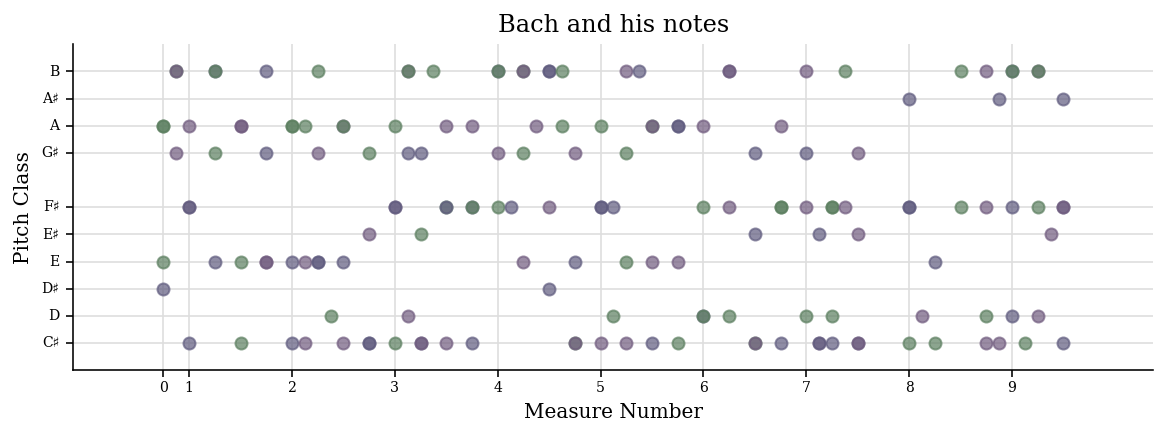

In [16]:
scatter.process()

Do you see that the first point has moved from C# to D#?  Very nice.

In case it's not clear, we can add an annotation to the plot.  After generating the plot once, it is stored in a variable called `.subplot`:

In [17]:
scatter.subplot

On that subplot we can use any of the `Artist` tools found in the matplotlib toolkit (for more info [click here](http://matplotlib.org/2.0.2/users/artists.html).  For instance, we can add a circle around that dot to make it clearer:

In [18]:
# it is customary to rename matplotlib.pyplot as plt
from matplotlib import pyplot as plt
center = (0.0, 3) # right on the dot
radius = 1.0
circleDsharp = plt.Circle(center, radius, color='red', alpha=0.5)
scatter.subplot.add_artist(circleDsharp)

Of course we can't call `.run()` any more since that recreates the data from the stream.  But we also can't call process, since that recreates the subplot.  Instead to reuse the existing `.subplot` we should call `.write()`

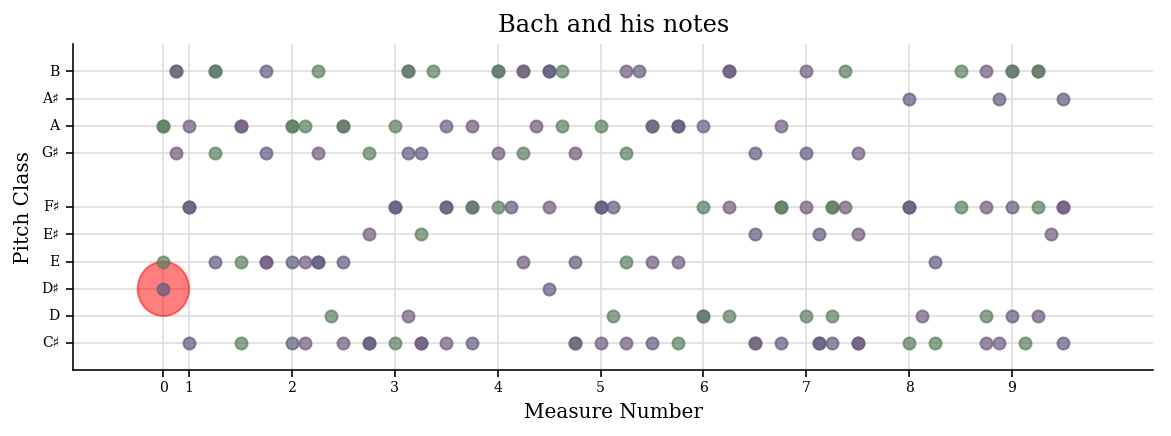

In [19]:
scatter.write()

Because we've skewed our figureSize, it's more of an ellipse than a circle, but you get the idea.  So to review:

* `.run()` the first time, to process the stream and get the data.
* `.process()` when the data has been changed and the figure needs to be regenerated from data.
* `.write()` when the figure has been created once, annotated, and needs to be seen again.

If you want to do the whole process without showing the figures in the meantime, then set `.doneAction = None` before calling run the first time.  

..note:

    (Unfortunately, in the Jupyter notebook that I use to write docs, it'll generate the images still, 
    but maybe it'll be fixed in the future, but if you do this on your own it'll work)

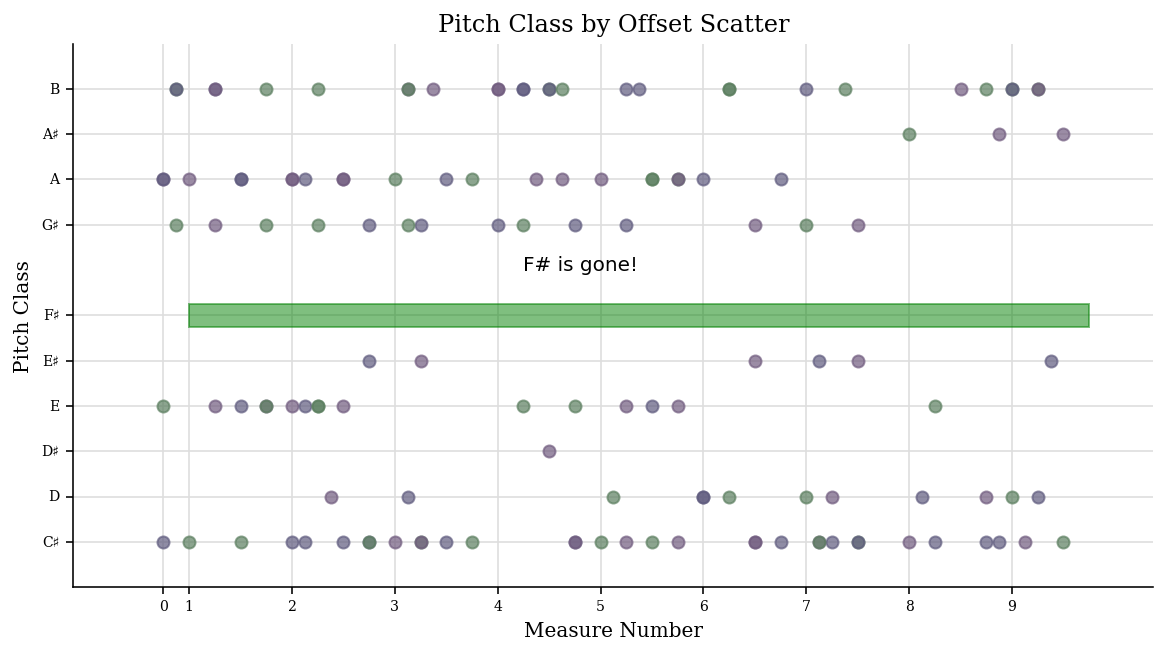

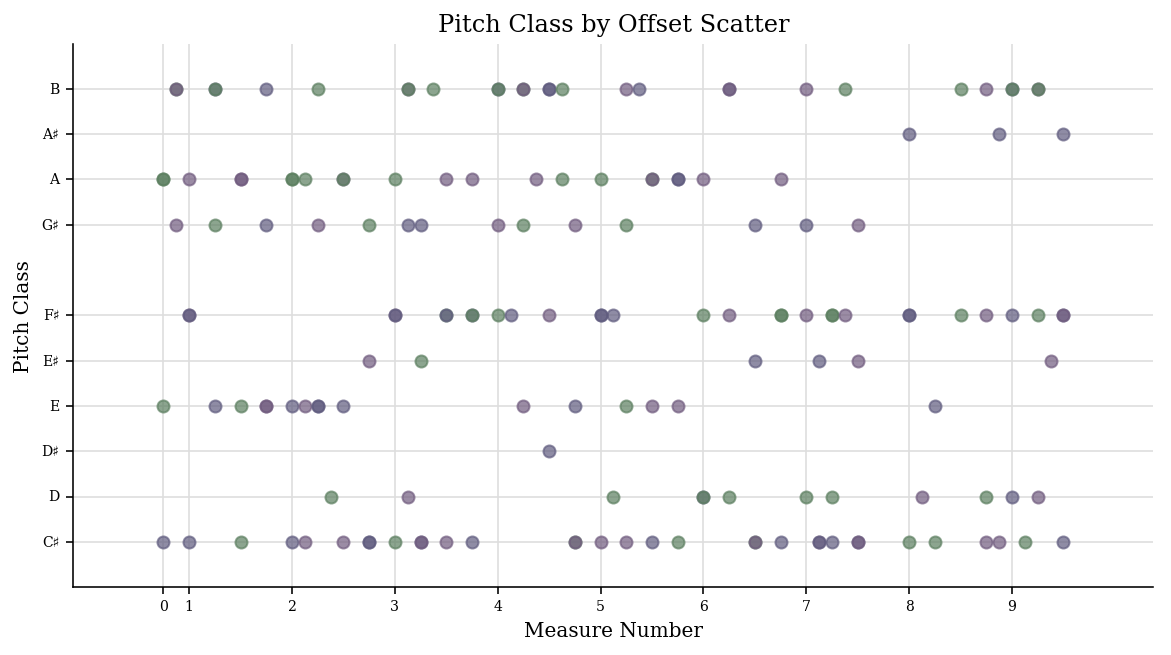

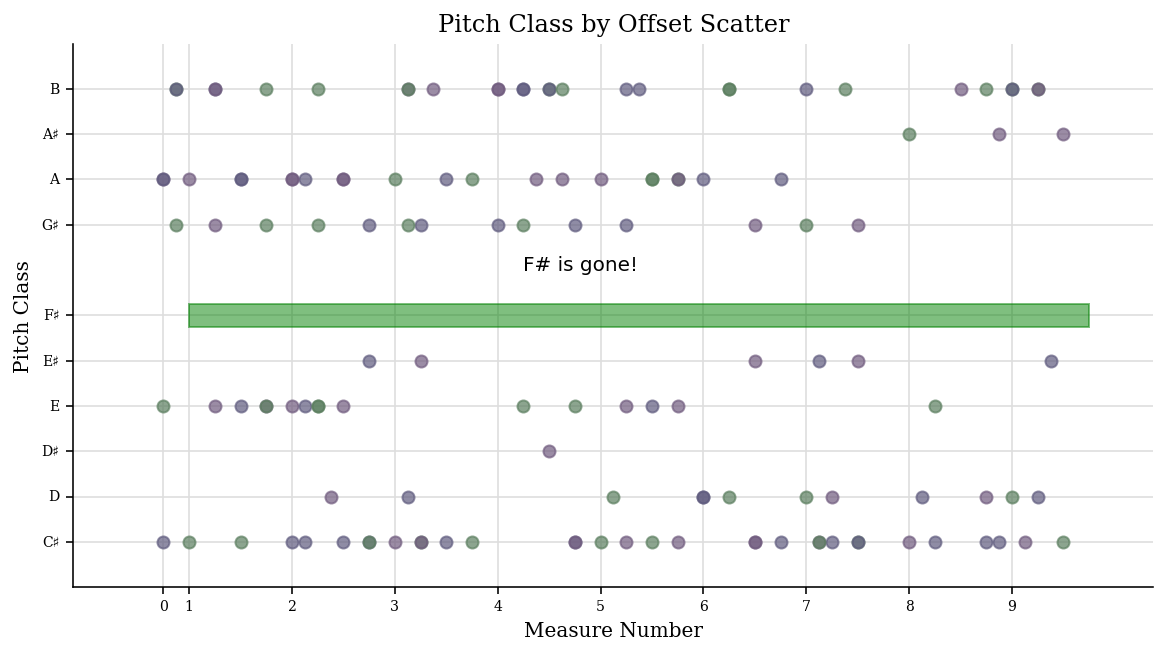

In [20]:
scatter2 = graph.plot.ScatterPitchClassOffset(bach)
scatter2.doneAction = None
scatter2.run()  # nothing is generated because of doneAction

scatterData = scatter2.data
newData = []
for dataPoint in scatterData:
    x, y, somethingElseIWillDiscussSoon = dataPoint
    
    if y == 6:  # F#
        continue # F sharp is evil! :-)
    newData.append(dataPoint)

scatter2.data = newData
scatter2.process() # rewrite the data
    
xyLowerLeft = (1, 5.75)
boxWidth = bach.highestTime - 1.0
boxHeight = 0.5
fSharpBox = plt.Rectangle(xyLowerLeft, boxWidth, boxHeight, color='green', alpha=0.5)
scatter2.subplot.add_artist(fSharpBox)

textAnnotation = plt.Text(bach.highestTime / 2 - 4, 7, 'F# is gone!')
scatter2.subplot.add_artist(textAnnotation)

scatter2.write()

## Axis (and allies)

When calling `Stream.plot()` or `plotStream(stream)` or using `getPlotsToMake()` we've been passing in two different types of arguments, the first is the type of Graph primitive to make and the second and subsequent are the quantities to put on the X and Y axes.  Each quantity has an :class:`~music21.graph.axis.Axis` object that generates it.  Let's look more closely at a simple set of axes, the :class:`~music21.graph.axis.PitchClassAxis` and the :class:`~music21.graph.axis.QuarterLengthAxis`.  The others are similar.

First we'll create a Plot object that uses these axes, such as :class:`~music21.graph.plot.ScatterPitchClassQuarterLength`:

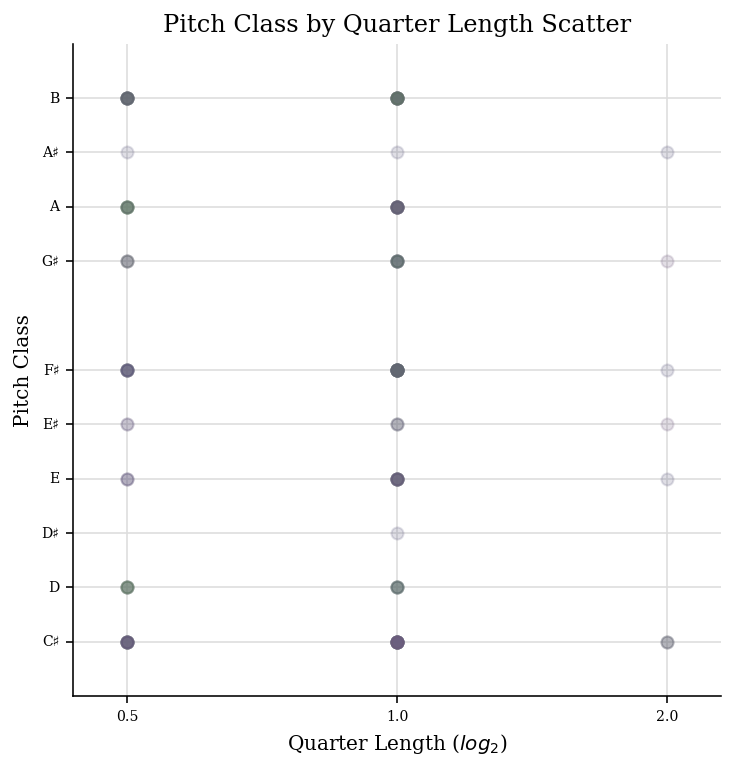

In [21]:
scatter3 = graph.plot.ScatterPitchClassQuarterLength(bach)
scatter3.run()

Now let's look inside it for the axes:

In [22]:
scatter3.axisX

<music21.graph.axis.QuarterLengthAxis: x axis for ScatterPitchClassQuarterLength>

In [23]:
scatter3.axisY

<music21.graph.axis.PitchClassAxis: y axis for ScatterPitchClassQuarterLength>

Each axis defines its own label name:

In [24]:
(scatter3.axisX.label, scatter3.axisY.label)

('Quarter Length ($log_2$)', 'Pitch Class')

(The use of '\$log_2\$' shows how TeX formatting can be used in labels -- too advanced a subject to discuss here, but something to consider)

Axes also know their axis name, their `client` (the Plot object), and the stream they are operating on:

In [25]:
(scatter3.axisY.axisName, scatter3.axisY.client, scatter3.axisY.stream)

('y',
 <music21.graph.plot.ScatterPitchClassQuarterLength for <music21.stream.Score bwv66>>,
 <music21.stream.Score bwv66>)

There are three important things that any axis must do:

1. Take in each element and return values
2. Define the extent of the axis (minimum and maximum)
3. Show where "ticks", that is, the axis value labels and grid lines will be.

If the second or third aren't given then some default values will be used.  The first is the only one that absolutely needs to be defined to do anything useful, so we'll look at it first.  Axes work on individual elements through the "extractOneElement" method.  A typical extractOneElement, such as for `PitchClassAxis` looks something like this:

    def extractOneElement(self, n, formatDict_ignore_for_now):
        if hasattr(n, 'pitch'):
            return n.pitch.pitchClass
            
If the element is something that the axis cannot handle (say a Rest) feel free to return None or just don't set a return value.

for instance, if there were a 'Cardinality Axis' which reported the number of pitches at that moment, it would look something like this:

In [26]:
class CardinalityAxis(graph.axis.Axis):
    labelDefault = 'Number of Pitches'
    
    def extractOneElement(self, el, formatDict):
        if hasattr(el, 'pitches'):
            return len(el.pitches)
        else:
            return 0

Testing is always important:

In [27]:
ca = CardinalityAxis()
ca.extractOneElement(chord.Chord('C E G'), None)

3

In [28]:
ca.extractOneElement(note.Note('D#'), None)

1

In [29]:
ca.extractOneElement(note.Rest(), None)

0

Here we can rely on the default values for the :meth:`~music21.graph.axis.Axis.setBoundariesFromData`
and :meth:`~music21.graph.axis.Axis.ticks` methods since they will get the minimum and maximum value
from the data and give numeric ticks which seems fine to me.  Let's try this on a Schoenberg piece
with a lot of chords.

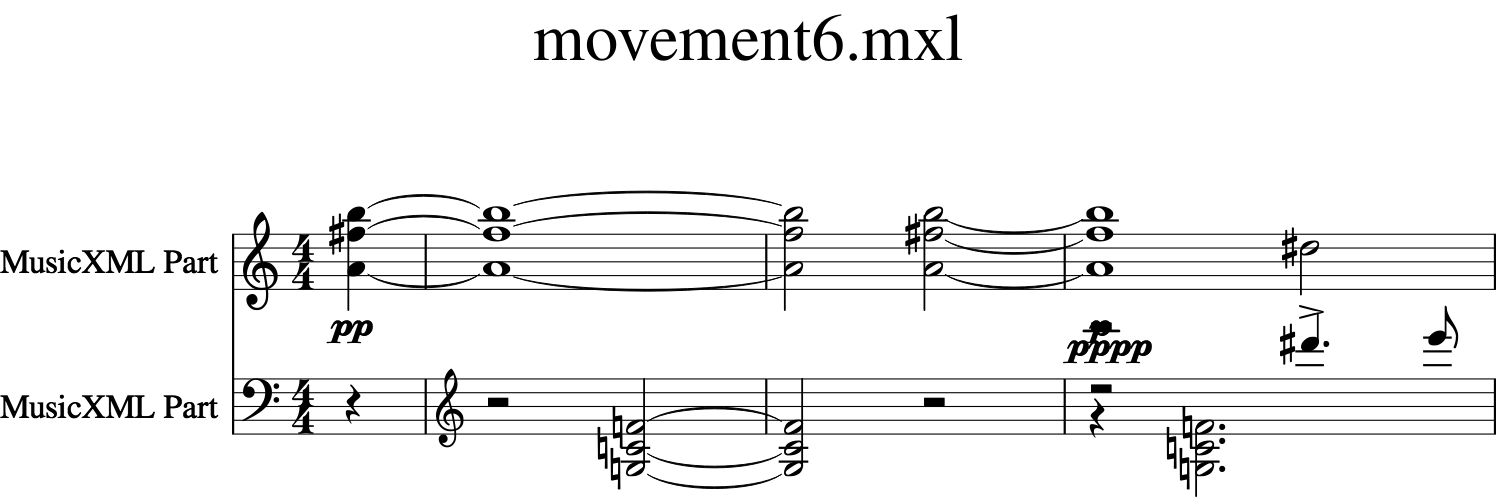

In [30]:
schoenberg6 = corpus.parse('schoenberg/opus19', 6)
schoenberg6.measures(1, 4).show()

We'll chordify the piece so that each chord has all the notes from each part:

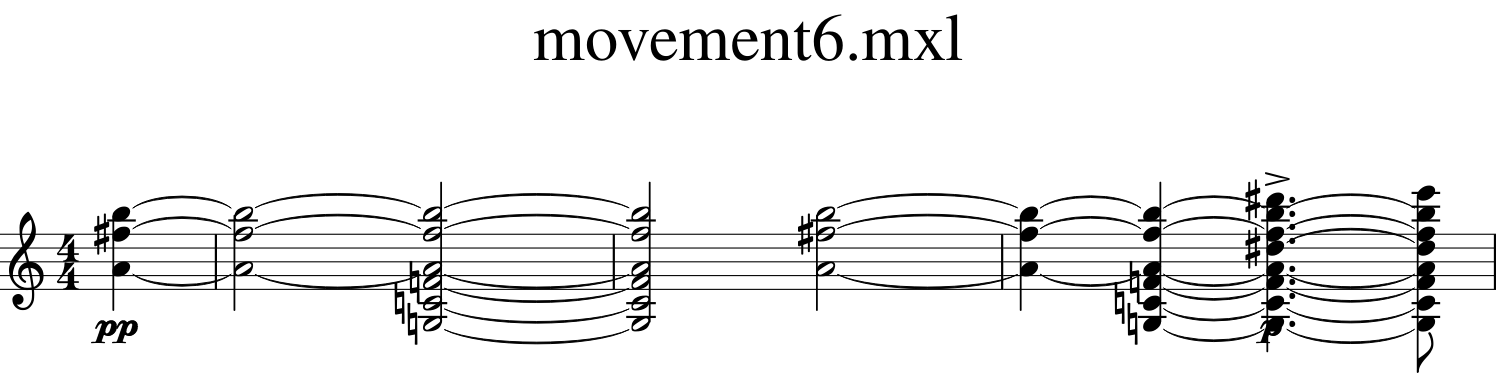

In [31]:
schChords = schoenberg6.chordify()
schChords.measures(1, 4).show()

Now we'll create a generic Scatter object to handle it:

In [32]:
plotS = graph.plot.Scatter(schChords)

And add a title and two axes, one being our new Cardinality axis:

In [33]:
plotS.title = 'Offset vs Cardinality'
plotS.axisX = graph.axis.OffsetAxis(plotS, 'x')
plotS.axisY = CardinalityAxis(plotS, 'y')

Notice that in instantiating an axis, we pass in the plot name and the axis label.  Both are important.

Now let's run it!

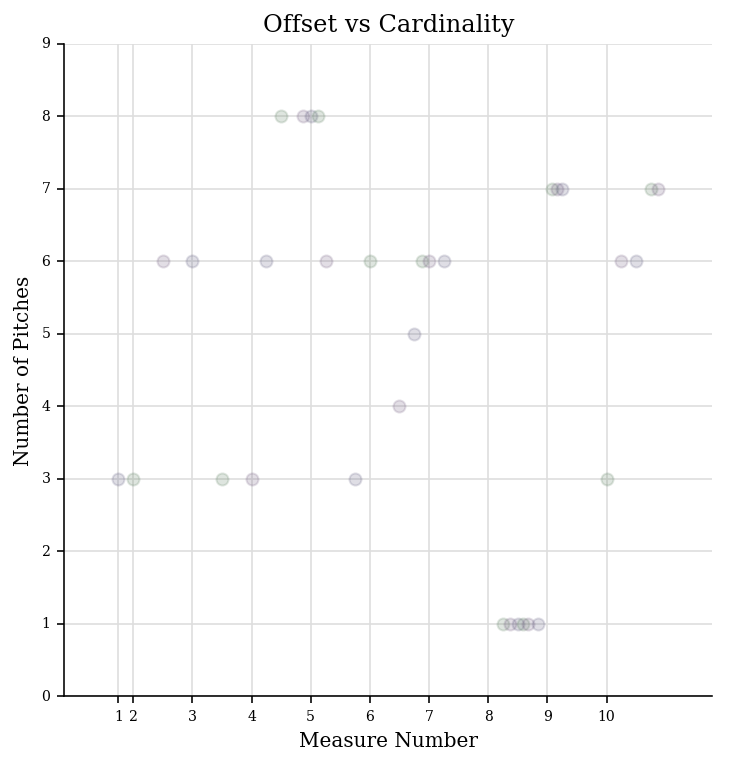

In [34]:
plotS.run()

Pretty cool, eh?  Maybe we should customize the tick values:

In [35]:
def cardinalityTicks(self):
    names = ['rest', 'single', 'dyad', 'triad', 'tetrachord', 'pentachord', 'hexachord', 'septachord', 'octochord']
    ticks = []
    for i in range(int(self.minValue), int(self.maxValue) + 1):
        tickLocation = i
        cardinalityName = names[i] # ideally, check that names[i] exists
        tickTuple = (tickLocation, cardinalityName)
        ticks.append(tickTuple)
    return ticks

CardinalityAxis.ticks = cardinalityTicks

We will set up our Scatter plot so that it gets rests also, reset the axis minimum to None (so it learns from the data) and we'll be set to run.

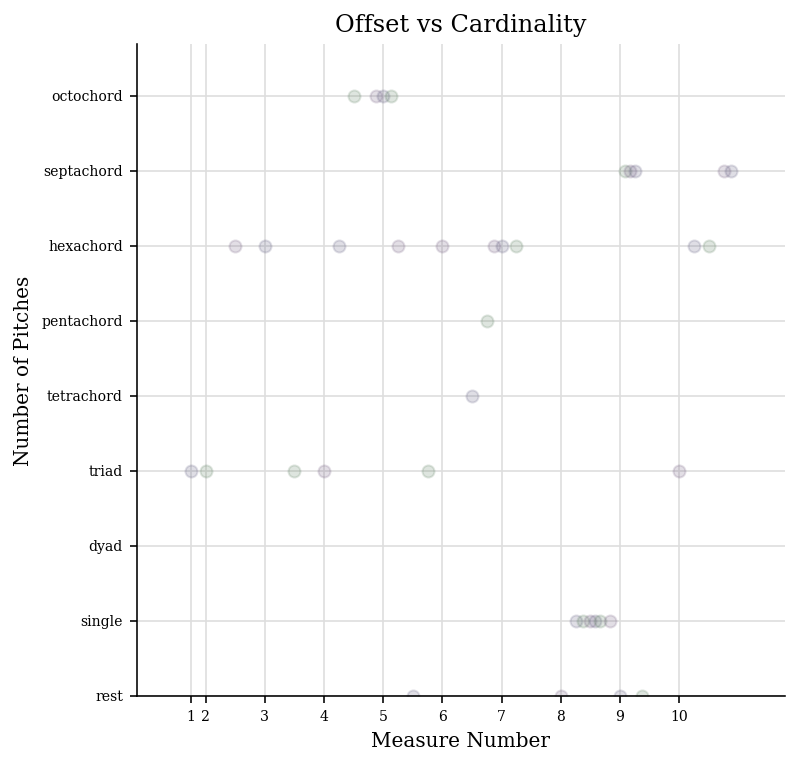

In [36]:
plotS.classFilterList.append('Rest')
plotS.axisY.minValue = None
plotS.run()

Ideally, we'd set a slightly different minValue in `.setBoundariesFromData` so that the bottom of the rest dots wasn't cut off, etc. but this is pretty good to start.

After all the data has been extracted, each axis gets a chance to manipulate all the data however it sees fit in the `.postProcessData` method; the only axis that currently manipulates data is the `CountingAxis` in its :meth:`~music21.graph.axis.CountingAxis.postProcessData` routine, which consolidates duplicate entries and gets a count of them.  But for the most part, setting `.ticks` and `.extractOneElement` will be enough to make a great new axis.

## Customizing Data Points

Instead of adding things like circles directly to the graph, it's possible to manipulate the display attributes of individual data points directly.  To do this, we can manipulate the last element of each piece of data, called the `formatDict`, which is just a dictionary of formatting values to pass to matplotlib.  Some of the common ones are:

* 'alpha' sets transparency, from 0 (transparent) to 1 (opaque).
* 'color' gives a color to the data point -- specified like "red" or "green" or an HTML color like "#ff0044"
* 'marker' on a scatter plot will choose a shape for a marker as in [this diagram](https://matplotlib.org/api/markers_api.html)
* 'markersize' gives the size of the marker -- notice that we're using matplotlib names, so the "s" of size is lowercased (in `music21` almost everything is camelCase)

Let's make a new axis class which returns the frequency of each pitch but also changes its marker according to whether it's in a certain key or not:

In [37]:
class FrequencyScaleAxis(graph.axis.Axis):
    labelDefault = 'Frequency'
    
    def __init__(self, client=None, axisName='y'):
        super().__init__(client, axisName)
        self.scale = scale.MajorScale('C')
        
    def ticks(self):
        '''
        Only get multiples of 400 as ticks
        '''
        ticks = super().ticks()
        newTicks = [tick for tick in ticks if tick[0] % 400 == 0]
        return newTicks
    
    def extractOneElement(self, el, formatDict):
        if not hasattr(el, 'pitch'):
            # perhaps a chord?
            # in which case the individual notes
            # will come here later
            return None
        
        scalePitches = self.scale.pitches
        pitchNames = [p.name for p in scalePitches]
        
        # modify formatDict in place
        
        if el.pitch.name in pitchNames:
            formatDict['marker'] = 'o'
            formatDict['color'] = 'red'
            formatDict['markersize'] = 10
        else:
            formatDict['marker'] = 'd'
            formatDict['color'] = 'black'
            formatDict['markersize'] = 8            
        
        return int(el.pitch.frequency)
        

Check to see that it works:

In [38]:
fsa = FrequencyScaleAxis()
formatDict = {}
n = note.Note('A4')
fsa.extractOneElement(n, formatDict)

440

In [39]:
formatDict

{'color': 'red', 'marker': 'o', 'markersize': 10}

In [40]:
formatDict = {}
n = note.Note('B-4')
fsa.extractOneElement(n, formatDict)

466

In [41]:
formatDict

{'color': 'black', 'marker': 'd', 'markersize': 8}

Let's make a stream with some data:

In [42]:
s = stream.Stream()
for ps in range(48, 96):
    n = note.Note()
    n.pitch.ps = ps
    s.append(n)

Okay, let's create a Scatter plot and make it happen:

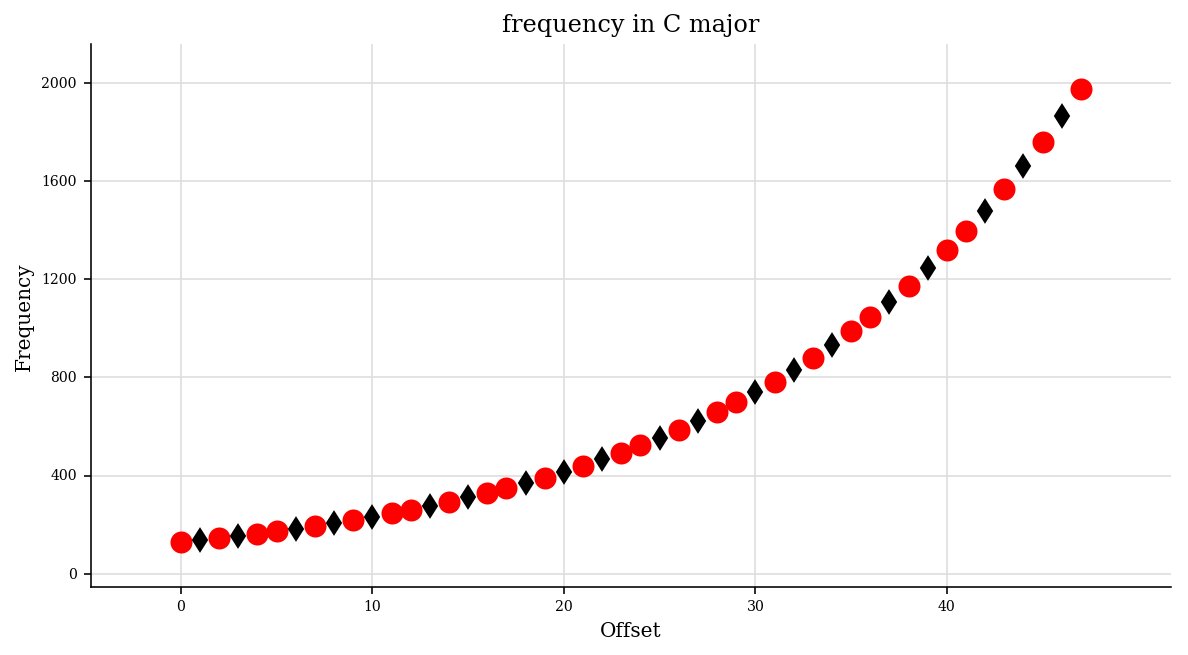

In [43]:
scatterFreq = graph.plot.Scatter(s, title='frequency in C major')
scatterFreq.figureSize = (10, 5)
scatterFreq.alpha = 1
scatterFreq.axisX = graph.axis.OffsetAxis(scatterFreq, 'x')
scatterFreq.axisY = FrequencyScaleAxis(scatterFreq, 'y')
scatterFreq.run()

## Graph Primitives

Untill now, all our our examples have used Plot classes taken from :ref:`moduleGraphPlot` because they were acting on streams to get their data.  If you wanted to make graphs of data not coming from a Stream you could use matplotlib directly -- they have a great tutorial on [using their `pyplot` interface](https://matplotlib.org/users/pyplot_tutorial.html), for instance.  Or if you want to get some of the advantages of the `music21` Plot types without going all the way into matplotlib, there are Graph primitives in the :ref:`moduleGraphPrimitives` module.  Here are some examples of how those work:

Here is a way of plotting the life and death dates of composers.  We will put both Schumanns on the same line to show how that can be done.

In [44]:
data = [('Chopin', [(1810, 1849-1810)]),
        ('Schumanns', [(1810, 1856-1810), (1819, 1896-1819)]),
        ('Brahms', [(1833, 1897-1833)])]

data

[('Chopin', [(1810, 39)]),
 ('Schumanns', [(1810, 46), (1819, 77)]),
 ('Brahms', [(1833, 64)])]

Each box has a starting point (birth date) and length.  For the length we needed to calculate lengths of lives for each composer, and I didn't have that information, so I just subtracted the death year from the birth year.

Because we are creating graphs on our own, we will need to define our own tick values.

In [45]:
xTicks = [(1810, '1810'), 
          (1848, '1848'), 
          (1897, '1897')]

_Music history/European history Pop Quiz! Why a tick at 1848?_ 😊  _Okay, back to not being a musicology prof..._

Now we can create a GraphHorizontalBar and `process` (not `run`) it:

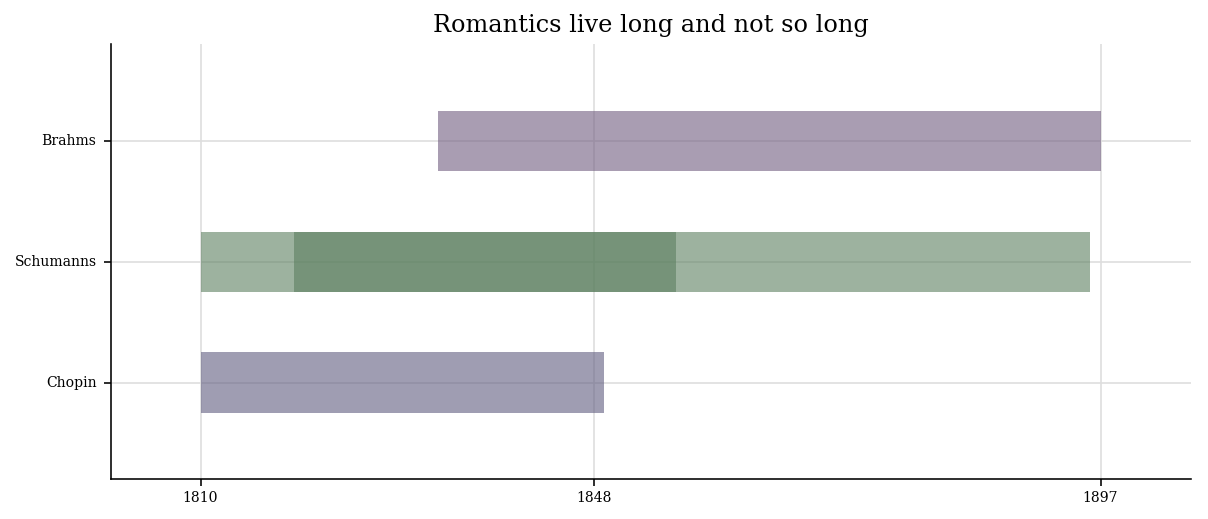

In [46]:
ghb = graph.primitives.GraphHorizontalBar()
ghb.title = 'Romantics live long and not so long'
ghb.data = data
ghb.setTicks('x', xTicks)
ghb.process()

Here is an example that graphs seven major scales next to each 
other in terms of frequency showing which notes are present
and which notes are not:

In [47]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
data = []

for numSharps in range(0, 7):
    keySig = key.KeySignature(numSharps)
    majScale = keySig.getScale('major')
    tonicPitch = majScale.tonic
    scaleDict = {'color': colors[numSharps]}
    for deg in range(1, 8):
        thisPitch = majScale.pitchFromDegree(deg)
        thisPitch.transposeAboveTarget(tonicPitch, inPlace=True)
        data.append((tonicPitch.pitchClass, thisPitch.pitchClass, thisPitch.frequency, scaleDict))

data[0:10]

[(0, 0, 261.6255653005985, {'color': 'red'}),
 (0, 2, 293.66476791740746, {'color': 'red'}),
 (0, 4, 329.62755691286986, {'color': 'red'}),
 (0, 5, 349.2282314330038, {'color': 'red'}),
 (0, 7, 391.99543598174927, {'color': 'red'}),
 (0, 9, 440.0, {'color': 'red'}),
 (0, 11, 493.8833012561241, {'color': 'red'}),
 (7, 7, 391.99543598174927, {'color': 'orange'}),
 (7, 9, 440.0, {'color': 'orange'}),
 (7, 11, 493.8833012561241, {'color': 'orange'})]

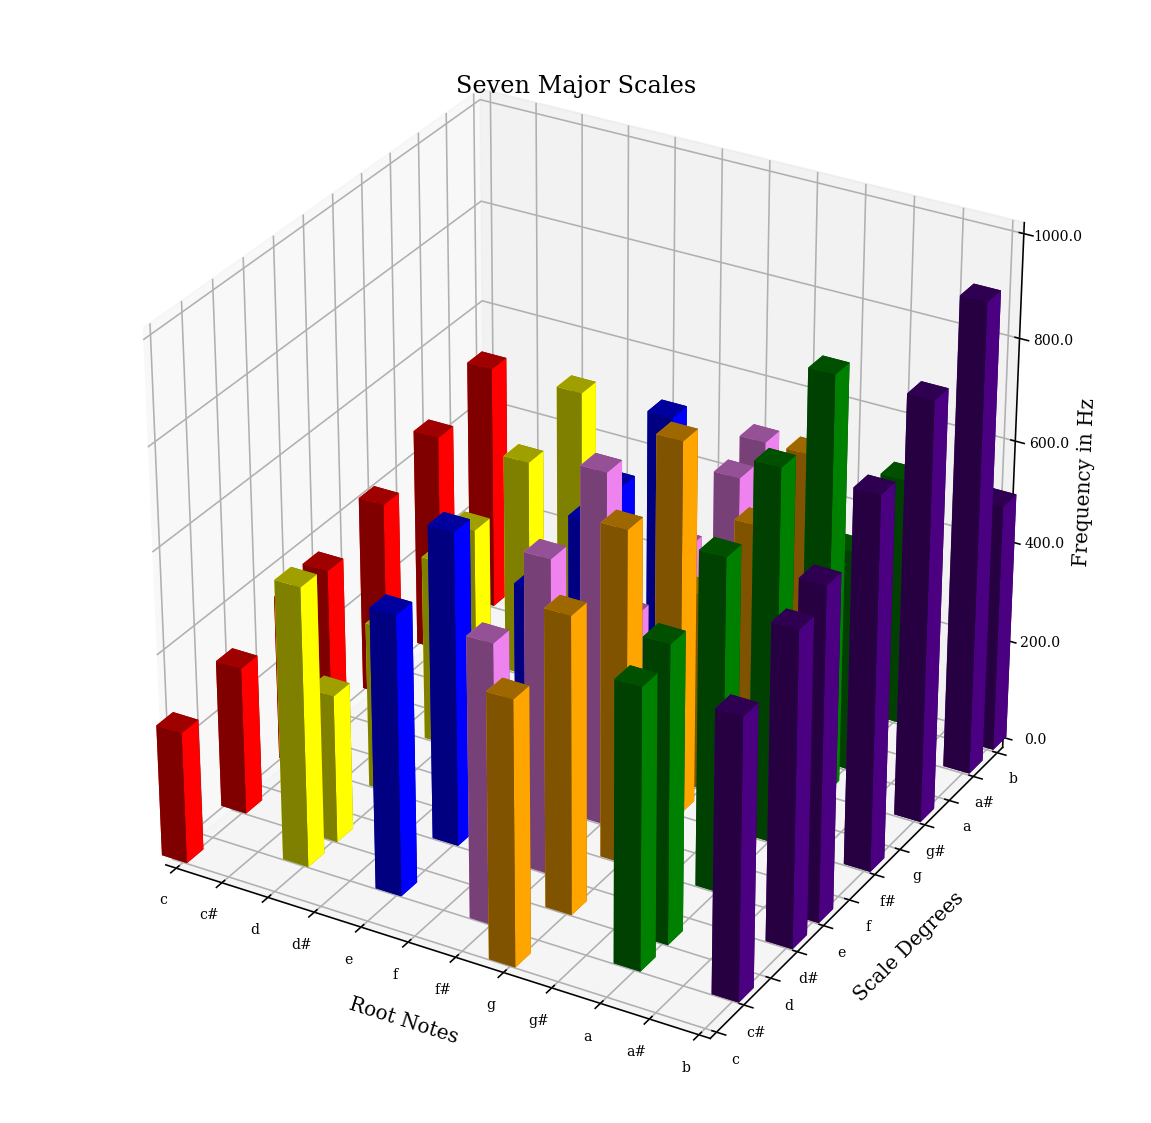

In [48]:
a = graph.primitives.Graph3DBars(title='Seven Major Scales',
                                 alpha=0.5,
                                 barWidth=0.2,
                                 useKeyValues=True,
                                 figureSize=(10, 10, 4),
                                )
a.data = data
a.axis['x']['ticks'] = (range(12), ('c c# d d# e f f# g g# a a# b').split())
a.axis['y']['ticks'] = (range(12), ('c c# d d# e f f# g g# a a# b').split())
a.axis['z']['range'] = (0, 1000)

a.setAxisLabel('x', 'Root Notes')
a.setAxisLabel('y', 'Scale Degrees')
a.setAxisLabel('z', 'Frequency in Hz')
a.process()

But sometimes you need to go all the way back to Matplotlib to get the graph that you want, such as this graph showing the motion of individual parts in a Bach Chorale:

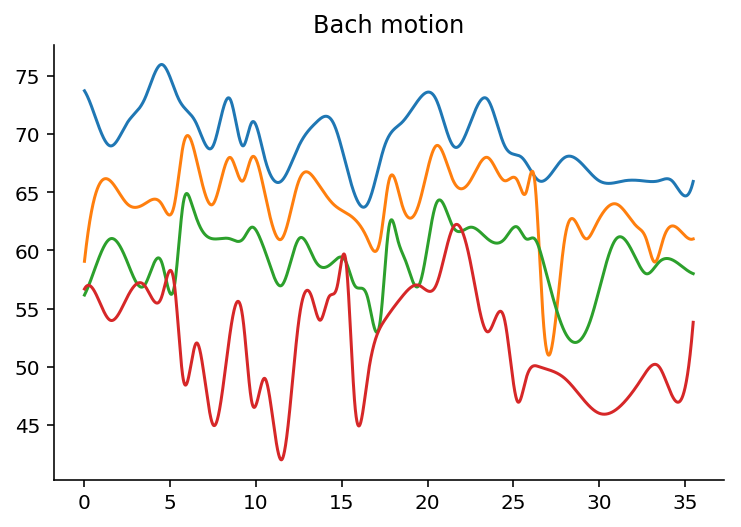

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from music21 import corpus

bach = corpus.parse('bwv66.6')

fig = plt.figure()

for i in range(len(bach.parts)):
    top = bach.parts[i].flat.notes
    y = [n.pitch.ps for n in top]
    x = [n.offset + n.quarterLength/2.0 for n in top]

    tick = interpolate.splrep(x, y, s=0)
    xnew = np.arange(0, max(x), 0.01)
    ynew = interpolate.splev(xnew, tick, der=0)
    
    subplot = fig.add_subplot(1, 1, 1)
    subplot.plot(xnew,ynew)
    subplot.spines['top'].set_color('none')
    subplot.spines['right'].set_color('none')
    
plt.title('Bach motion')

plt.show()

Well, that's enough for getting down to details.  If it's all a bit of a blur, remember that calling `.plot()` with a few parameters on any stream will usually be enough to be able to visualize a score in interesting ways.

## Embedding in Apps: Selecting the matplotlib Backend

Most people will graph music21 data using matplotlib's default system for rendering and displaying
images (called the backend).  That default system is the TkAgg backend or the backend for Jupyter/IPython.  
But for embedding music21 in other graphical user interfaces you may want to choose another backend.

For instance if you wanted to use music21 in a Qt application, or Kivy, or a web application, you would probably need a different backend.

See the following discussion at [What is a backend?](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend) for more information.

Enough with graphs...who knows what the next chapter will be?  For now, go ahead to :ref:`Chapter 53, Advanced Corpus and Metadata Searching <usersGuide_53_advancedCorpus>`